# Import Libraries

In [1]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load Files

In [2]:
model = load_model('model_improvement.h5')

2024-12-28 17:02:20.884848: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-28 17:02:20.884885: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-28 17:02:20.884894: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-28 17:02:20.885104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-28 17:02:20.885301: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Inferencing

In [3]:
# Path ke folder gambar
img_folder = 'data_inference'

# Preprocessing semua gambar dalam folder
img_size = (220, 220)
batch_data = []
filenames = []

for img_name in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_name)
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    batch_data.append(img_array)
    filenames.append(img_name)

# Konversi batch_data ke numpy array
batch_data = np.array(batch_data)

In [4]:
# Melakukan prediksi
predictions = model.predict(batch_data)
predicted_classes = np.argmax(predictions, axis=-1)

# Mapping indeks ke nama kelas
class_indices = {
    0: 'Cardboard',
    1: 'Food Organics',
    2: 'Glass',
    3: 'Metal',
    4: 'Paper',
    5: 'Plastic'
}
predicted_labels = [class_indices[cls] for cls in predicted_classes]
probs = np.max(predictions, axis=-1)  # Probabilitas tertinggi untuk setiap prediksi

2024-12-28 17:02:22.811031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step


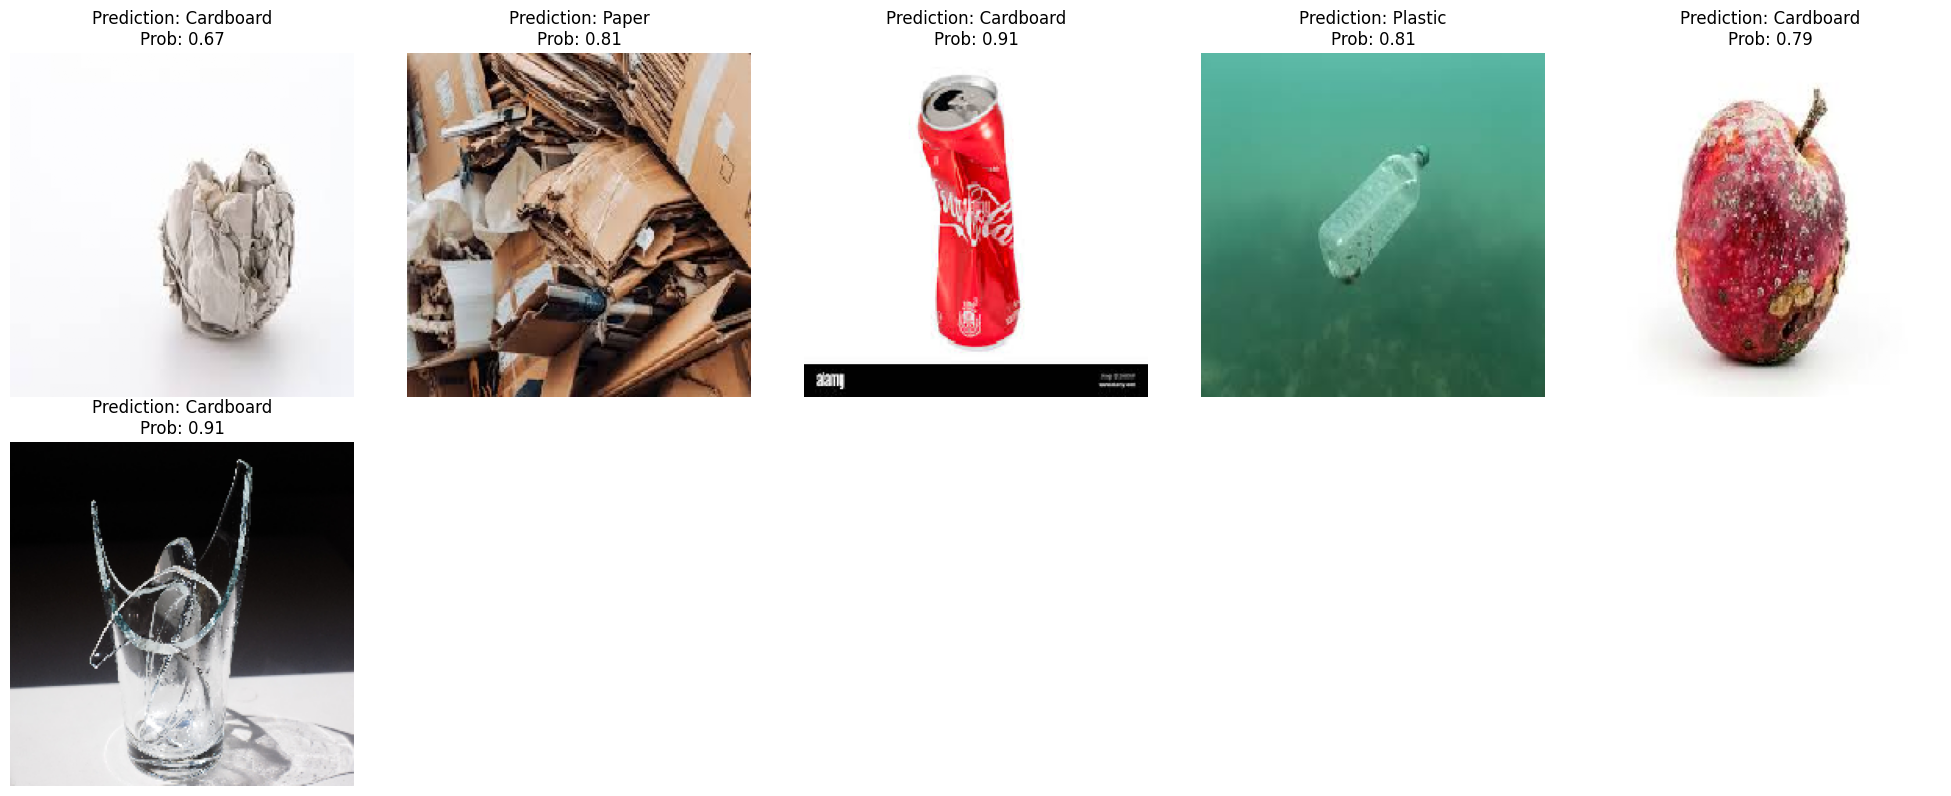

In [5]:
# Visualisasi hasil prediksi
plt.figure(figsize=(20, 8))  # Sesuaikan ukuran visualisasi

# Mengatur grid 2x5 untuk 10 gambar
for i in range(len(batch_data)):
    plt.subplot(2, 5, i + 1)  # Menampilkan 10 gambar dalam grid 2x5
    img = batch_data[i]
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_labels[i]}\nProb: {probs[i]:.2f}")

plt.tight_layout()
plt.show()

Based on the inference data above, the model made the following misclassifications:

- **Paper** was misclassified as **Cardboard**.  
- **Cardboard** was misclassified as **Paper**.  
- **Metal** was misclassified as **Cardboard**.  
- **Food Organics** was misclassified as **Cardboard**.  
- **Glass** was misclassified as **Cardboard**.  

These misclassifications indicate that the model struggles with distinguishing between categories that may share visual similarities or lack distinct features, particularly involving **Cardboard** as a frequent misclassification target. Further analysis and potential enhancements, such as improving the quality of training data or refining model architecture, may be necessary to address these errors.